# FizzBuzz in TensorFlow

## Dataset

First, let's try to get the dataset for our problem. Here is a simple one-liner to prepare the training data

In [ ]:
def get_training_data(min_range:int = 1, max_range:int = 100):
    return {x: 'fizzbuzz' if x % 15==0 else "buzz" if x%5==0 else "fizz" if x%3 == 0 else x for x in range(min_range,max_range)}

In [ ]:
data = get_training_data(101, 2400)

test_data = get_training_data(1, 101)

## Machine Learning

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [ ]:
labels = ['number', 'fizz','buzz','fizzbuzz']
sequence_length =4


def convert_to_vector(num):
    n = num
    out = []
    while n > 0:
        out.append(n%10)
        n //= 10
    
    return out[::-1]

def convert_to_int(label):
    if label in labels:
        return labels.index(label)
    else:
        return 0

def fizz_buzz_pred(i, prediction):
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]


def convert_list_to_vector(data):
    out = np.array([convert_to_vector(x) for x in data],dtype=object)
    return pad_sequences(out, maxlen=sequence_length)

def convert_list_to_int(data):
    return np.array([convert_to_int(x) for x in data])

In [ ]:
X = convert_list_to_vector(data.keys())
y = convert_list_to_int(data.values())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,shuffle=True)

## Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *

from keras_lr_finder import LRFinder
from keras_contrib.callbacks.cyclical_learning_rate import CyclicLR
from tensorflow.keras.optimizers import SGD

In [ ]:

embed_size = 3
model = tf.keras.Sequential()
model.add(Input(shape=(sequence_length,)))

model.add(Embedding(10, embed_size, trainable=True ))

model.add(Conv1D(64, kernel_size=2, padding='same',kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])

Epoch 1/2
29/29 [==============================] - 0s 2ms/step - loss: 1.3356 - sparse_categorical_accuracy: 0.3980
Epoch 2/2
29/29 [==============================] - 0s 526us/step - loss: 5.4761 - sparse_categorical_accuracy: 0.4141


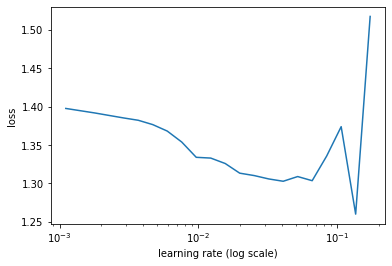

In [ ]:
lr_finder = LRFinder(model)

lr_finder.find(X_train, y_train, start_lr=1e-4, end_lr=100, batch_size=64,epochs=2)

lr_finder.plot_loss()


In [ ]:
ACCURACY_THRESHOLD = 0.99
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_sparse_categorical_accuracy') > ACCURACY_THRESHOLD):
            print('Reached %2.2f%% accuracy, on the epoch %d so stopping training' %(ACCURACY_THRESHOLD, epoch))
            self.model.stop_training=True

In [ ]:
callbacks = myCallback()

# 3. Fit using Callback
clr = CyclicLR(base_lr = 0.005, max_lr = 0.01, step_size=1000, mode='triangular')
#model.fit(X_train, y_train, batch_size = 128, epochs=2, callbacks= [lr_finder])

model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[callbacks,clr], epochs=4000, batch_size=64)

Epoch 1/4000
29/29 [==============================] - 0s 3ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.8554 - val_loss: 2.7169 - val_sparse_categorical_accuracy: 0.8630 - lr: 0.0051
Epoch 2/4000
29/29 [==============================] - 0s 2ms/step - loss: 0.3714 - sparse_categorical_accuracy: 0.8380 - val_loss: 2.7847 - val_sparse_categorical_accuracy: 0.8804 - lr: 0.0053
Epoch 3/4000
29/29 [==============================] - 0s 2ms/step - loss: 0.4203 - sparse_categorical_accuracy: 0.8434 - val_loss: 3.0388 - val_sparse_categorical_accuracy: 0.8761 - lr: 0.0054
Epoch 4/4000
29/29 [==============================] - 0s 2ms/step - loss: 0.3692 - sparse_categorical_accuracy: 0.8434 - val_loss: 2.9076 - val_sparse_categorical_accuracy: 0.8652 - lr: 0.0056
Epoch 5/4000
29/29 [==============================] - 0s 2ms/step - loss: 0.3692 - sparse_categorical_accuracy: 0.8439 - val_loss: 2.8988 - val_sparse_categorical_accuracy: 0.8848 - lr: 0.0057
Epoch 6/4000
29/29 [===============

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 853us/step - loss: 0.0683 - sparse_categorical_accuracy: 0.9739


[0.0683269053697586, 0.9739130139350891]

## Evaluation

In [ ]:
X_test = convert_list_to_vector(test_data.keys())
y_test = convert_list_to_int(test_data.values())

In [ ]:
X_test

array([[0, 0, 0, 1],
       [0, 0, 0, 2],
       [0, 0, 0, 3],
       [0, 0, 0, 4],
       [0, 0, 0, 5],
       [0, 0, 0, 6],
       [0, 0, 0, 7],
       [0, 0, 0, 8],
       [0, 0, 0, 9],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [0, 0, 1, 3],
       [0, 0, 1, 4],
       [0, 0, 1, 5],
       [0, 0, 1, 6],
       [0, 0, 1, 7],
       [0, 0, 1, 8],
       [0, 0, 1, 9],
       [0, 0, 2, 0],
       [0, 0, 2, 1],
       [0, 0, 2, 2],
       [0, 0, 2, 3],
       [0, 0, 2, 4],
       [0, 0, 2, 5],
       [0, 0, 2, 6],
       [0, 0, 2, 7],
       [0, 0, 2, 8],
       [0, 0, 2, 9],
       [0, 0, 3, 0],
       [0, 0, 3, 1],
       [0, 0, 3, 2],
       [0, 0, 3, 3],
       [0, 0, 3, 4],
       [0, 0, 3, 5],
       [0, 0, 3, 6],
       [0, 0, 3, 7],
       [0, 0, 3, 8],
       [0, 0, 3, 9],
       [0, 0, 4, 0],
       [0, 0, 4, 1],
       [0, 0, 4, 2],
       [0, 0, 4, 3],
       [0, 0, 4, 4],
       [0, 0, 4, 5],
       [0, 0, 4, 6],
       [0, 0, 4, 7],
       [0, 0,

In [ ]:
y_test

array([0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0,
       0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0,
       3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 6.3372 - sparse_categorical_accuracy: 0.3600


[6.337208271026611, 0.36000001430511475]

In [ ]:
inputs = np.array(list(range(1,101)))
input_vector = list(map(convert_to_vector, inputs))
input_vector = pad_sequences(np.array(input_vector, dtype=object), maxlen=sequence_length)

predictions = model(input_vector).numpy()


def convert_fb(num):
    if num % 15 == 0:
        return "fizzbuzz"
    
    elif num % 3 == 0:
        return "fizz"
    
    elif num % 5 == 0:
        return "buzz"
    
    else:
        return str(num)
    
acc = 0
total = 0
for i,inp in enumerate(inputs):
    pred = np.argmax(predictions[i])
    print(inp, fizz_buzz_pred(inp, pred), convert_fb(inp), predictions[i][pred])
    
    acc += 1 if fizz_buzz_pred(inp, pred) == convert_fb(inp) else 0
    total += 1
    
print(f'Accuracy = {acc*1.0 / total}')
    
    

1 1 1 0.9687891
2 fizz 2 0.99978083
3 3 fizz 0.9994246
4 4 4 0.9766748
5 buzz buzz 0.7401922
6 6 fizz 0.9995003
7 7 7 0.9583682
8 fizz 8 0.99969196
9 9 fizz 0.99949276
10 buzz buzz 0.99985576
11 fizz 11 0.99990904
12 12 fizz 0.9979255
13 fizz 13 0.6415334
14 fizz 14 0.99990475
15 buzz fizzbuzz 0.99821246
16 fizz 16 0.6512693
17 fizz 17 0.9999329
18 18 fizz 0.99832255
19 fizz 19 0.69735134
20 fizz buzz 0.999967
21 21 fizz 0.99999225
22 fizz 22 0.9999999
23 23 23 0.99529004
24 24 fizz 0.99999464
25 fizzbuzz buzz 0.5337174
26 26 26 0.9964055
27 27 fizz 0.9999956
28 fizz 28 0.9999999
29 29 29 0.9969131
30 fizzbuzz fizzbuzz 0.99688596
31 31 31 0.99999547
32 32 32 0.99999917
33 33 fizz 0.99507165
34 34 34 0.99999785
35 fizz buzz 0.8134341
36 36 fizz 0.9950128
37 37 37 0.9999987
38 38 38 0.9999994
39 39 fizz 0.99484694
40 buzz buzz 0.99984944
41 fizz 41 0.99991727
42 42 fizz 0.9989587
43 fizz 43 0.60915864
44 fizz 44 0.99991333
45 buzz fizzbuzz 0.99861634
46 fizz 46 0.6266625
47 fizz 47 0.999